In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import wfdb
import os
import ast

2023-06-22 23:38:03.156963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = './ptbxl/'
ecg_data = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')

scp_data = pd.read_csv(path+'scp_statements.csv', index_col=0)
scp_data = scp_data[scp_data.diagnostic == 1]

In [3]:
def load_raw_data(df, path):
    data = [wfdb.rdsamp(os.path.join(path, link)) for link in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

ecg_signal = load_raw_data(ecg_data, path)

In [4]:
ecg_data['scp_codes'] = ecg_data['scp_codes'].apply(lambda x: ast.literal_eval(x))

In [5]:
def diagnostic_classes(scp):
    res = set()
    for k in scp.keys():
        if k in scp_data.index:
            res.add(scp_data.loc[k].diagnostic_class)
    
    return list(res)

ecg_data['scp_classes'] = ecg_data['scp_codes'].apply(diagnostic_classes)

In [6]:
type(ecg_data.loc[1, 'nurse'])


numpy.float64

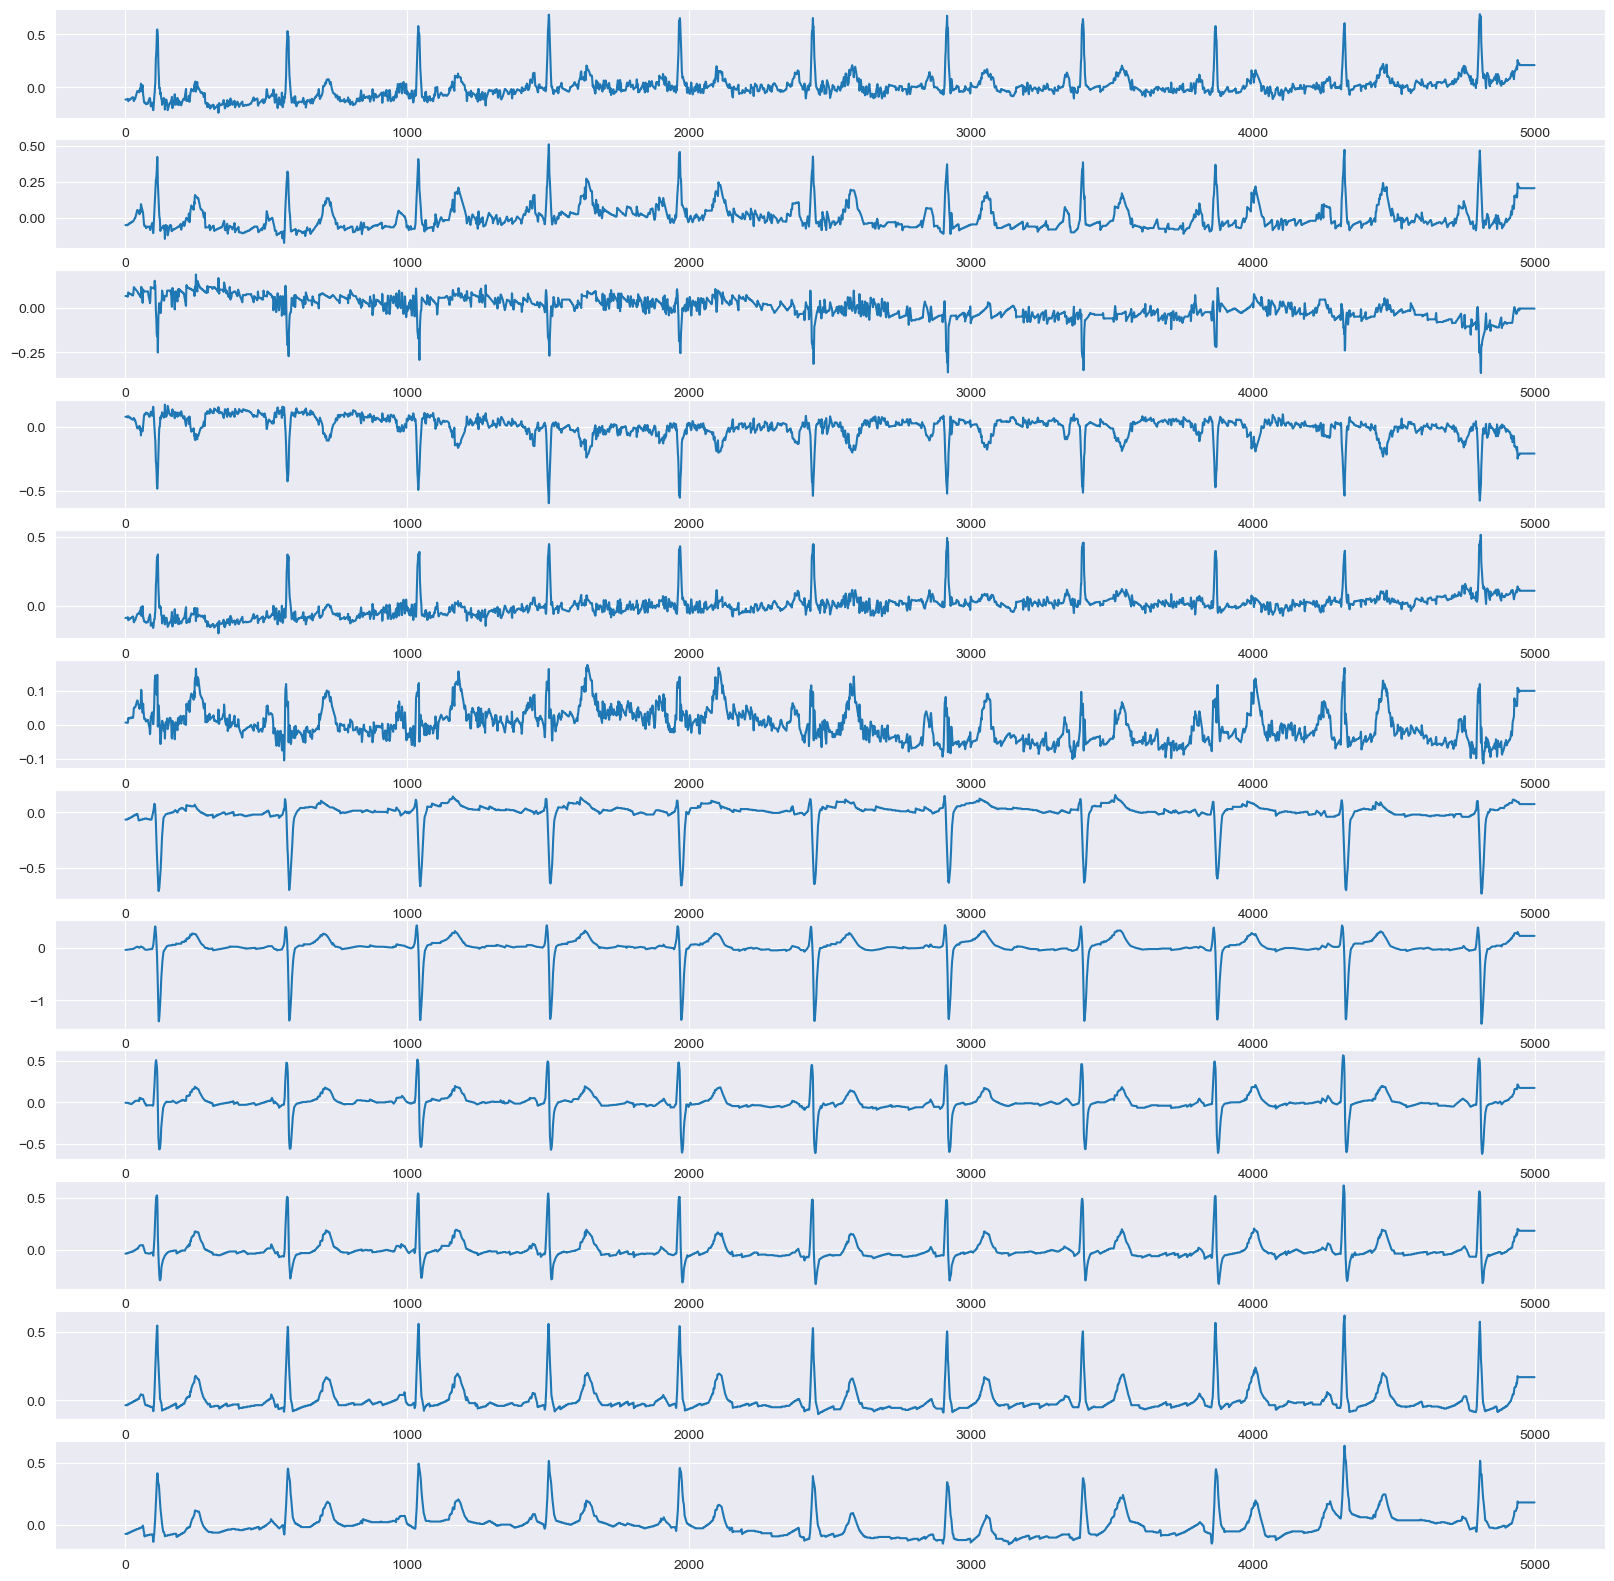

In [7]:
sns.set_style("darkgrid")

sample = ecg_signal[0]
sample.shape
fix, axes = plt.subplots(sample.shape[1], 1, figsize=(20,20))
for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])
plt.show()

In [8]:
ecg_data.columns

# to see unique values
ecg_data.infarction_stadium1.unique()
ecg_data['heart_axis'].unique()

ecg_data['pacemaker'].unique()


array([nan, 'ja, pacemaker', 'PACE????, nan', 'ja, nan', '?, nan'],
      dtype=object)

In [9]:
# to see number of values
ecg_data[[col for col in ecg_data.columns if col not in ('scp_codes', 'scp_classes')]].nunique(dropna=True)

patient_id                      18885
age                                94
sex                                 2
height                             77
weight                            127
nurse                              12
site                               51
device                             11
recording_date                  21813
report                           9883
heart_axis                          8
infarction_stadium1                 6
infarction_stadium2                 3
validated_by                       12
second_opinion                      2
initial_autogenerated_report        2
validated_by_human                  2
baseline_drift                    321
static_noise                      124
burst_noise                       103
electrodes_problems                14
extra_beats                       128
pacemaker                           4
strat_fold                         10
filename_lr                     21837
filename_hr                     21837
dtype: int64

In [10]:
ecg_data.isnull().sum()

patient_id                          0
age                                89
sex                                 0
height                          14854
weight                          12408
nurse                            1509
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8505
infarction_stadium1             16211
infarction_stadium2             21734
validated_by                     9411
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20230
static_noise                    18575
burst_noise                     21224
electrodes_problems             21807
extra_beats                     19883
pacemaker                       21544
strat_fold                          0
filename_lr                         0
filename_hr 

In [11]:
ecg_data

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,scp_classes
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]


In [12]:
X = pd.DataFrame(index=ecg_data.index)

X['sex'] = ecg_data['sex']

X['height'] = ecg_data.groupby('sex')['height'].transform(lambda x: x.fillna(x.mean()))

X['weight'] = ecg_data.groupby('sex')['weight'].transform(lambda x: x.fillna(x.mean()))

X['infarction_stadium1'] = ecg_data['infarction_stadium1'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ecg_data['infarction_stadium2'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

# 0 represents unknown
X['heart_axis'] = ecg_data.heart_axis.replace({
    'LAD': 1,
    'ALAD': 2,
    'RAD': 3,
    'AXR': 4,
    'MID': 5,
    'ARAD': 6,
    'AXL': 7,
    'SAG': 8
}).fillna(0)

X['pacemaker'] = (ecg_data.pacemaker == 'ja, pacemaker').astype(float)

# X represents meta data
X

,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
ecg_id,,,,,,,
1,1,160.987860,63.000000,0.0,0.0,0.0,0.0
2,0,173.494364,70.000000,0.0,0.0,0.0,0.0
3,1,160.987860,69.000000,0.0,0.0,0.0,0.0
4,0,173.494364,82.000000,0.0,0.0,0.0,0.0
5,1,160.987860,70.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21833,1,160.987860,64.556847,0.0,0.0,1.0,0.0
21834,0,173.494364,78.504823,4.0,0.0,5.0,0.0
21835,1,160.987860,64.556847,0.0,0.0,5.0,0.0


In [13]:
# Y variable for signal
Y = ecg_signal

In [14]:
type(ecg_data.loc[1, 'scp_classes'])

list

In [15]:
Z = pd.DataFrame(0, index=ecg_data.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')

for i in Z.index:
    for j in ecg_data.loc[i, 'scp_classes']:
        Z.loc[i, j] = 1

In [16]:
# finished target data

Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


In [17]:
Z['NORM'] = Z['NORM'].fillna(0)

In [18]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, MaxPooling1D, Dense

In [19]:
# split data based on recommended strat folds

# Training data
X_train = X[ecg_data.strat_fold <= 8]
Y_train = Y[ecg_data[ecg_data.strat_fold <= 8].index - 1]
Z_train = Z[ecg_data.strat_fold <= 8]

In [20]:
# Valuation Data
X_val = X[ecg_data.strat_fold == 9]
Y_val = Y[ecg_data[ecg_data.strat_fold == 9].index - 1]
Z_val = Z[ecg_data.strat_fold == 9]

In [21]:
# test data
X_test = X[ecg_data.strat_fold == 10]
Y_test = Y[ecg_data[ecg_data.strat_fold == 10].index - 1]
Z_test = Z[ecg_data.strat_fold == 10]

In [22]:
# ensure shapes match
print(f'X_train: {X_train.shape} Y_train: {Y_train.shape} Z_train: {Z_train.shape}')
print(f'X_val: {X_val.shape} Y_val: {Y_val.shape} Z_val: {Z_val.shape}')
print(f'X_test: {X_test.shape} Y_test: {Y_test.shape} Z_test: {Z_test.shape}')

X_train: (17441, 7) Y_train: (17441, 5000, 12) Z_train: (17441, 5)
X_val: (2193, 7) Y_val: (2193, 5000, 12) Z_val: (2193, 5)
X_test: (2203, 7) Y_test: (2203, 5000, 12) Z_test: (2203, 5)


In [23]:
# scaling data
from sklearn.preprocessing import StandardScaler

In [24]:
# Scaling X
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [25]:
# Scaling Y
Y_scaler = StandardScaler()
Y_scaler.fit(Y_train.reshape(-1, Y_train.shape[-1]))

Y_train_scaled = Y_scaler.transform(Y_train.reshape(-1, Y_train.shape[-1])).reshape(Y_train.shape)
Y_val_scaled = Y_scaler.transform(Y_val.reshape(-1, Y_val.shape[-1])).reshape(Y_val.shape)
Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1, Y_test.shape[-1])).reshape(Y_test.shape)

In [26]:
Y_train.shape[-1]

Y_train.reshape(-1, Y_train.shape[-1]).shape

(87205000, 12)

In [27]:
X_train_scaled

,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
ecg_id,,,,,,,
1,1.044988,-0.815161,-0.762997,-0.320229,-0.066347,-0.979556,-0.115346
2,-0.956949,0.746306,-0.155879,-0.320229,-0.066347,-0.979556,-0.115346
3,1.044988,-0.815161,-0.242610,-0.320229,-0.066347,-0.979556,-0.115346
4,-0.956949,0.746306,0.884894,-0.320229,-0.066347,-0.979556,-0.115346
5,1.044988,-0.815161,-0.155879,-0.320229,-0.066347,-0.979556,-0.115346
...,...,...,...,...,...,...,...
21832,-0.956949,0.746306,0.581753,-0.320229,-0.066347,-0.537835,-0.115346
21833,1.044988,-0.815161,-0.627970,-0.320229,-0.066347,-0.537835,-0.115346
21834,-0.956949,0.746306,0.581753,2.777877,-0.066347,1.229048,-0.115346


In [28]:
Y_train

array([[[-0.115, -0.05 ,  0.065, ..., -0.035, -0.035, -0.075],
        [-0.115, -0.05 ,  0.065, ..., -0.035, -0.035, -0.075],
        [-0.115, -0.05 ,  0.065, ..., -0.035, -0.035, -0.075],
        ...,
        [ 0.21 ,  0.205, -0.005, ...,  0.185,  0.17 ,  0.18 ],
        [ 0.21 ,  0.205, -0.005, ...,  0.185,  0.17 ,  0.18 ],
        [ 0.21 ,  0.205, -0.005, ...,  0.185,  0.17 ,  0.18 ]],

       [[-0.015,  0.12 ,  0.135, ...,  0.16 ,  0.06 ,  0.065],
        [-0.015,  0.12 ,  0.135, ...,  0.16 ,  0.06 ,  0.065],
        [-0.015,  0.12 ,  0.135, ...,  0.16 ,  0.06 ,  0.065],
        ...,
        [-0.055,  0.015,  0.07 , ..., -0.215, -0.195, -0.13 ],
        [-0.055,  0.015,  0.07 , ..., -0.215, -0.195, -0.13 ],
        [-0.055,  0.015,  0.07 , ..., -0.215, -0.195, -0.13 ]],

       [[-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
        [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
        [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
        ...,
        [-0.

In [29]:
Y_test

array([[[-1.2000e-01, -8.5000e-02,  3.5000e-02, ..., -3.5000e-01,
         -2.5000e-01, -4.5000e-02],
        [-1.2000e-01, -8.5000e-02,  3.5000e-02, ..., -3.5000e-01,
         -2.5000e-01, -4.5000e-02],
        [-1.2000e-01, -8.5000e-02,  3.5000e-02, ..., -3.5000e-01,
         -2.5000e-01, -4.5000e-02],
        ...,
        [ 1.7000e-01,  1.5500e-01, -1.5000e-02, ...,  1.4000e-01,
          1.3000e-01,  7.0000e-02],
        [ 1.7000e-01,  1.5500e-01, -1.5000e-02, ...,  1.4000e-01,
          1.3000e-01,  7.0000e-02],
        [ 1.7000e-01,  1.5500e-01, -1.5000e-02, ...,  1.4000e-01,
          1.3000e-01,  7.0000e-02]],

       [[ 2.4000e-01,  2.9500e-01,  5.5000e-02, ...,  5.2000e-01,
          4.1000e-01,  4.1500e-01],
        [ 2.4000e-01,  2.9500e-01,  5.5000e-02, ...,  5.2000e-01,
          4.1000e-01,  4.1500e-01],
        [ 2.4000e-01,  2.9500e-01,  5.4000e-02, ...,  5.2000e-01,
          4.1000e-01,  4.1500e-01],
        ...,
        [ 1.1000e-01,  3.1500e-01,  2.0500e-01, ...,  

In [30]:
X_train_scaled

,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
ecg_id,,,,,,,
1,1.044988,-0.815161,-0.762997,-0.320229,-0.066347,-0.979556,-0.115346
2,-0.956949,0.746306,-0.155879,-0.320229,-0.066347,-0.979556,-0.115346
3,1.044988,-0.815161,-0.242610,-0.320229,-0.066347,-0.979556,-0.115346
4,-0.956949,0.746306,0.884894,-0.320229,-0.066347,-0.979556,-0.115346
5,1.044988,-0.815161,-0.155879,-0.320229,-0.066347,-0.979556,-0.115346
...,...,...,...,...,...,...,...
21832,-0.956949,0.746306,0.581753,-0.320229,-0.066347,-0.537835,-0.115346
21833,1.044988,-0.815161,-0.627970,-0.320229,-0.066347,-0.537835,-0.115346
21834,-0.956949,0.746306,0.581753,2.777877,-0.066347,1.229048,-0.115346


In [31]:
import joblib

In [32]:
joblib.dump(X_train_scaled, './preprocessed/X_train_scaled.joblib')
joblib.dump(Y_train_scaled, './preprocessed/Y_train_scaled.joblib')
joblib.dump(Z_train, './preprocessed/Z_train.joblib')
joblib.dump(X_test_scaled, './preprocessed/X_test_scaled.joblib')
joblib.dump(Y_test_scaled, './preprocessed/Y_test_scaled.joblib')
joblib.dump(Z_test, './preprocessed/Z_test.joblib')
joblib.dump(X_val_scaled, './preprocessed/X_val_scaled.joblib')
joblib.dump(Y_val_scaled, './preprocessed/Y_val_scaled.joblib')
joblib.dump(Z_val, './preprocessed/Z_val.joblib')

['./preprocessed/Z_val.joblib']

In [33]:
Z_train

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21832,0,0,0,1,0
21833,0,0,1,0,0
21834,1,0,0,0,0


: 